## CREDIT CARD FRAUD DETECTION PROJECT

Fraud detection is a problem that applicable in many industries including banks and financial sectors, insurance, government agencies and law enforcement.
#### Using a dataset of of nearly 28,500 credit card transactions and multiple unsupervised anomaly detection algorithms, we are going to identify transactions with a high probability of being credit card fraud. In this project, we will build and deploy the following two machine learning algorithms
##### Local Outlier Factor (LOF)
##### Isolation Forest Algorithm

In [20]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset as data
data = pd.read_csv("creditcard.csv")

In [3]:
#dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

#dataset describing
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### VISUALIZING THE DATA (Exploratory Data Analysis)

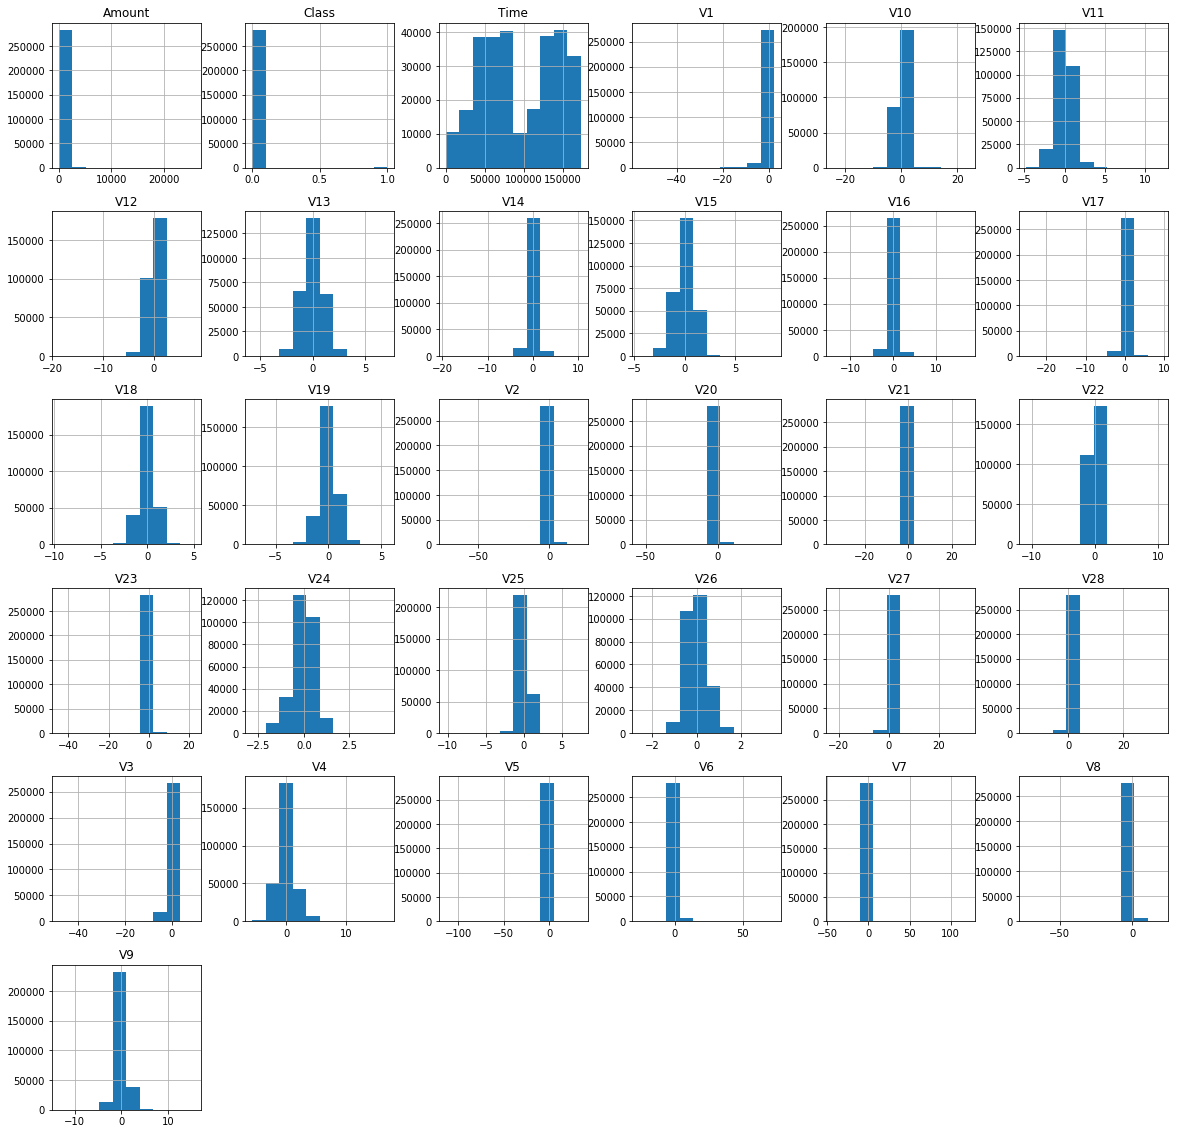

In [32]:
data.hist(figsize = (20,20))
plt.show()

### ANALYSIS

In [18]:
#trying to express the total number of fraudulent acts/cases in the dataset we have loaded.
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]

print('Fraudulent Transactions: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

Fraudulent Transactions: 492
Valid Transactions: 284315


In [62]:
print(data['Class'].value_counts()[0],'Valid transactions in total') 
print('Valid', round(data['Class'].value_counts()[0]/len(data) * 100,4), '% of the dataset \n')
print(data['Class'].value_counts()[1],'Fraud transactions in total') 
print('Fraud', round(data['Class'].value_counts()[1]/len(data) * 100,4), '% of the dataset') 

284315 Valid transactions in total
Valid 99.8273 % of the dataset 

492 Fraud transactions in total
Fraud 0.1727 % of the dataset


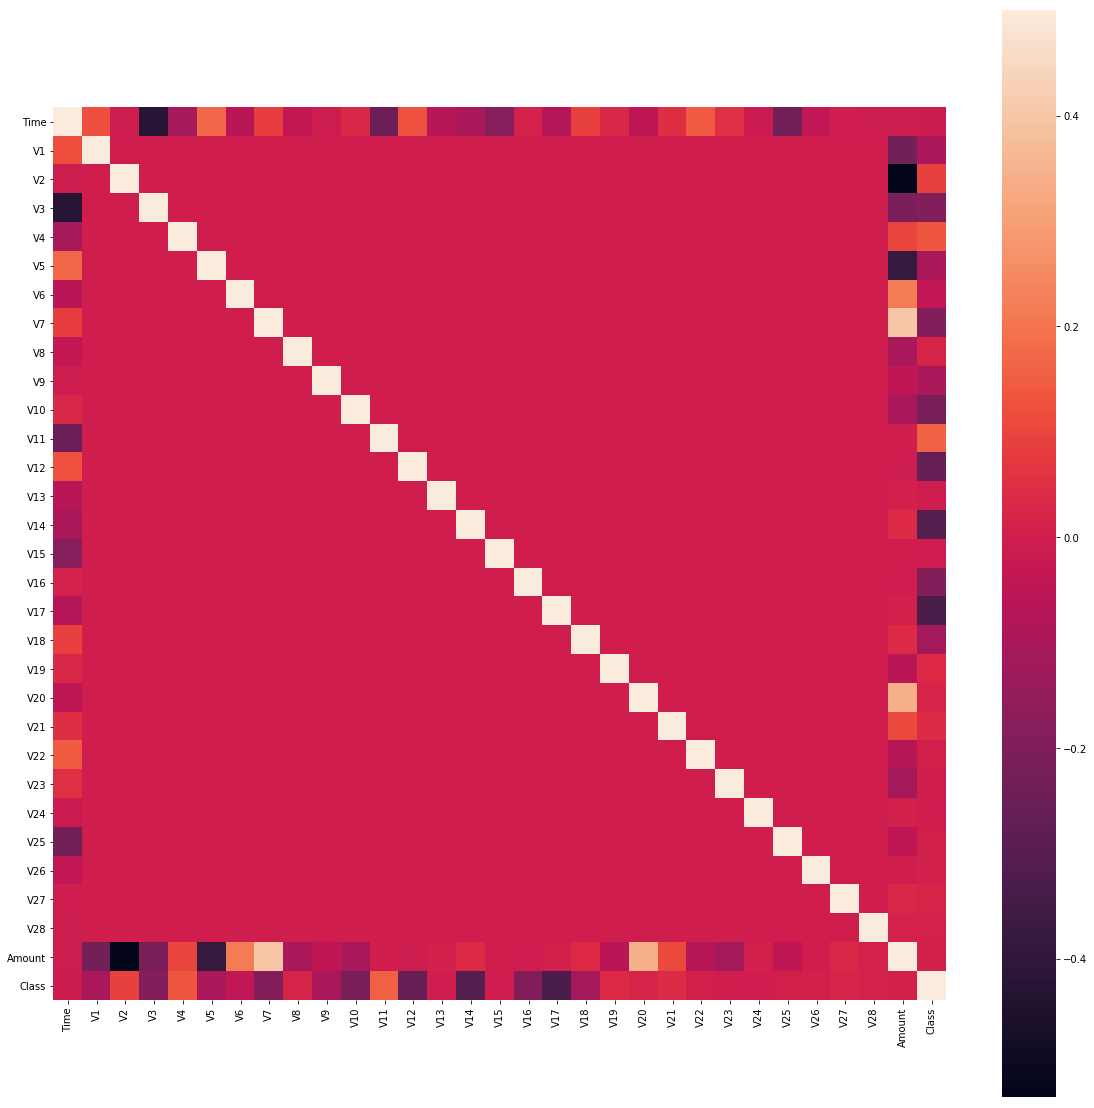

In [43]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (20, 20))

sns.heatmap(corrmat, vmax = .5, square = True)

In [44]:
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.0017304750013189597


In [55]:
# Get all the columns from the dataFrame
cols = data.columns.tolist()

# Filter the columns to remove data we do not want
cols = [c for c in cols if c not in ["Class"]]

# Store the variable we'll be predicting on
var_pred = "Class"

X = data[cols]
Y = data[var_pred]

# Print shapes
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [ ]:
plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 5)
for i, cn in enumerate(df.iloc[:,0:30]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=80)
    sns.distplot(df[cn][df.Class == 0], bins=80)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

In [69]:
data_v1 = data[data["Class"] == 1]
data_v0 = data[data["Class"] == 0]
# Splitting valid dataset into training: 60%, validation: 20%, testing: 20%
data_train, data_cv_v0, data_test_v0 = np.split(data_v0.sample(frac=1), [int(.6*len(data_v0)), int(.8*len(data_v0))])

# Splitting Fraud dataset into validation: 50%, testing: 50%
data_cv_v1, data_test_v1 = np.split(data_v1.sample(frac=1), [int(.5*len(data_v1))])

data_cv = pd.concat([data_cv_v0,data_cv_v1],axis=0)
data_test = pd.concat([data_test_v0,data_test_v1],axis=0)

In [71]:
print('Training Dataset                :', data_train['Class'].value_counts()[0])
print('Validation Dataset (Valid)      :', data_cv['Class'].value_counts()[0])
print('Validation Dataset (Fraud)      :', data_cv['Class'].value_counts()[1])
print('Testing Dataset (valid)         :', data_test['Class'].value_counts()[0])
print('Testing Dataset (Fraud)         :', data_test['Class'].value_counts()[1])

Training Dataset                : 170589
Validation Dataset (Valid)      : 56863
Validation Dataset (Fraud)      : 246
Testing Dataset (valid)         : 56863
Testing Dataset (Fraud)         : 246


## . Unsupervised Outlier Detection

Now that we have processed our data, for our machine learning algorithms.  We will use the following techniques: 

**Local Outlier Factor (LOF)**

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. 


**Isolation Forest Algorithm**

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [91]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.gridspec as gridspec

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [57]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 645
0.997735308472053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.35      0.35       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



<Figure size 648x504 with 0 Axes>

#### ISOLATION FOREST MODEL

In [72]:
model = IsolationForest(n_estimators=100, max_samples=256 , contamination=0.1, \
                        max_features=1, bootstrap=False, n_jobs=-1, random_state=2018, verbose=0)

In [73]:
model.fit(data_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.1,
        max_features=1, max_samples=256, n_estimators=100, n_jobs=-1,
        random_state=2018, verbose=0)

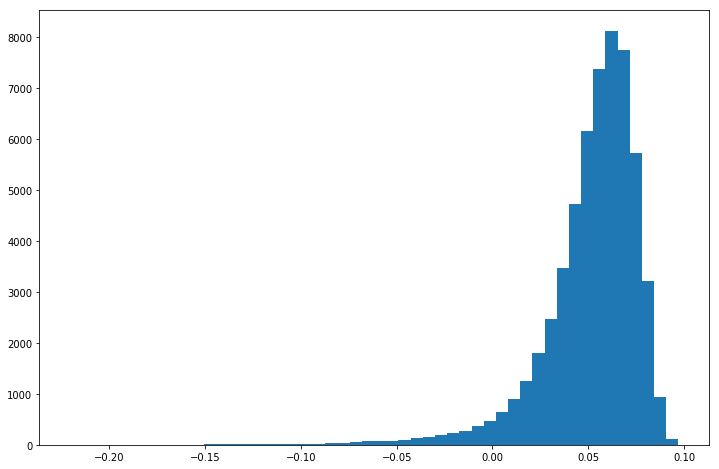

In [74]:
cv_score = model.decision_function(data_cv)
plt.figure(figsize=(12, 8))
plt.hist(cv_score, bins=50);

## Anomaly Detection vs Supervised Learning
This dataset does not have any null values and highly imbalance. Anomaly Detection is best for umbalance dataset and supervised learning is better if dataset balanced.

#### 99.8273% of total transaction is Non Fraud
#### 0.1727% of total transaction is Fraud

Text(0.5, 0, 'Valid vs Fraudulent')

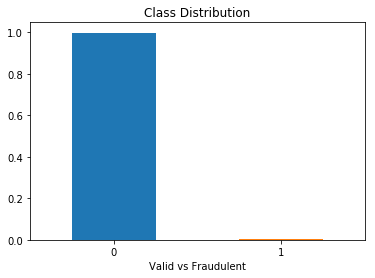

In [89]:
count_classes = pd.value_counts(data['Class'], sort = True, normalize=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), ['0','1'])
plt.xlabel("Valid vs Fraudulent")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


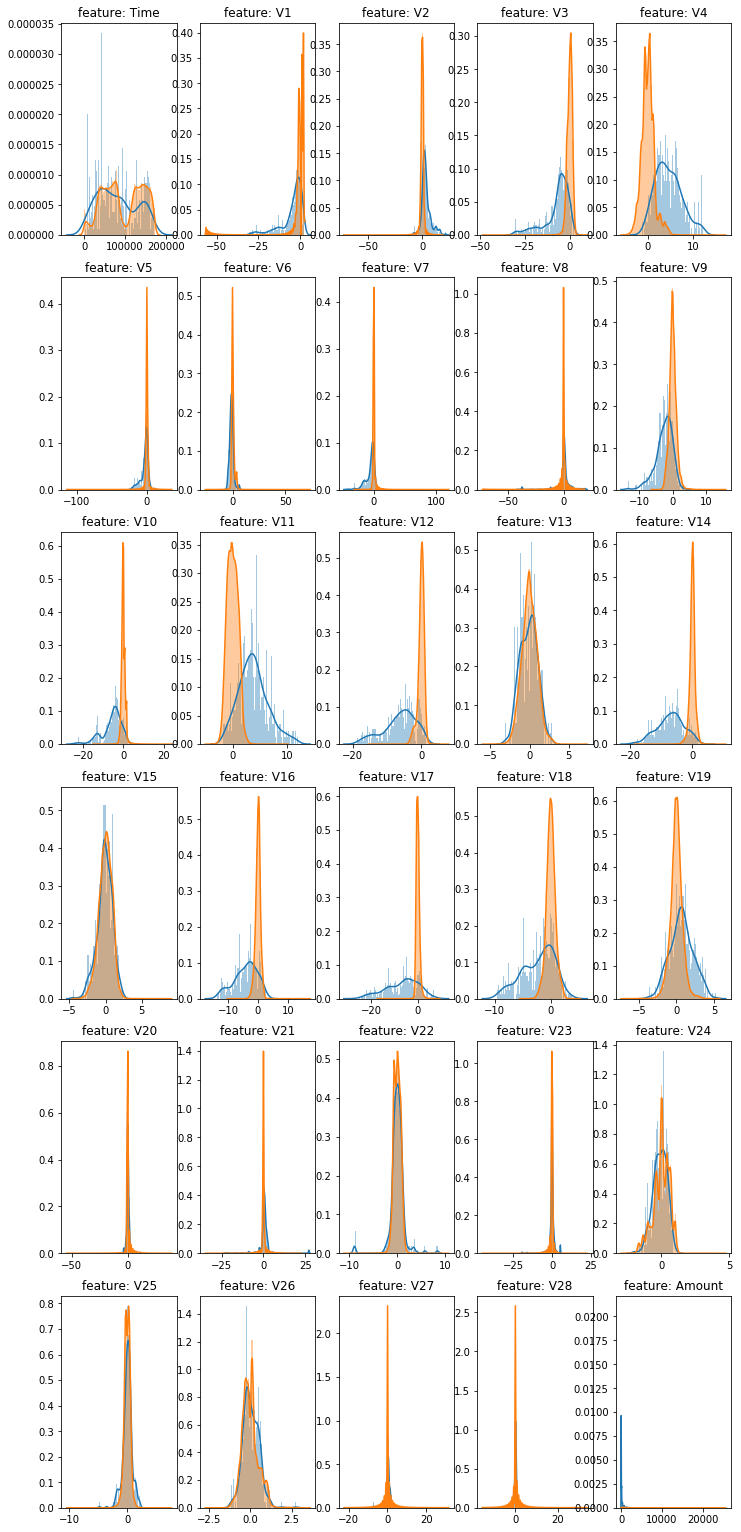

In [93]:
plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 5)
for i, cn in enumerate(data.iloc[:,0:30]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=80)
    sns.distplot(data[cn][data.Class == 0], bins=80)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

In [98]:
# Splitting nonFraid dataset into training: 60%, validation: 20%, testing: 20%
data_train, data_cv_v0, data_test_v0 = np.split(data_v0.sample(frac=1), [int(.6*len(data_v0)), int(.8*len(data_v0))])

# Splitting Fraid dataset into validation: 50%, testing: 50%
data_cv_v1, data_test_v1 = np.split(data_v1.sample(frac=1), [int(.5*len(data_v1))])

data_cv = pd.concat([data_cv_v0,data_cv_v1],axis=0)
data_test = pd.concat([data_test_v0,data_test_v1],axis=0)

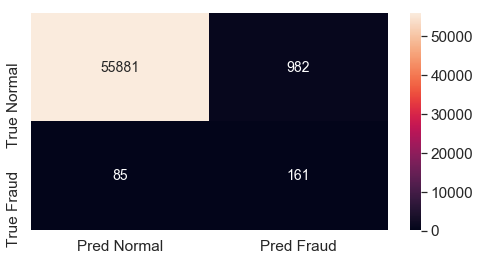

In [101]:
test_score = model.decision_function(data_test)
prediction=test_score.copy()
prediction=1-prediction

prediction_class=prediction.copy()
prediction_class[prediction>=np.percentile(prediction,98)]=1
prediction_class[prediction<np.percentile(prediction,98)]=0

cm = confusion_matrix(data_test_Y, prediction_class)
data_cm = pd.DataFrame(cm,['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])

plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(data_cm, annot=True, annot_kws={"size": 14}, fmt='g')

In [103]:
print(classification_report(data_test_Y, prediction_class))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.14      0.65      0.23       246

   micro avg       0.98      0.98      0.98     57109
   macro avg       0.57      0.82      0.61     57109
weighted avg       0.99      0.98      0.99     57109



#### THE END